In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs,make_moons


In [2]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=2,random_state=58,)
#X,Y=make_moons(n_samples=500,shuffle=True,noise=0.2,random_state=10,)
print(X.shape,Y.shape)

(500, 2) (500,)


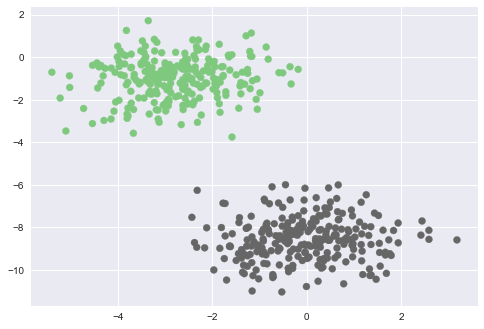

In [3]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [4]:
#Model and helper functions
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))
#sigmoid(5)
#z=np.array([1,2,3])
#sigmoid(z)

In [5]:
#now implement perceptron learning algorithm
def predict(X,weights):
    """X->m*(n+1) matrix w->(n*1) vector"""
    z=np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions
def loss(X,Y,weights):
    '''binary cross entropy'''
    Y_=predict(X,weights)
    cost=np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost
def update(X,Y,weights,learning_rate):
    """perform weight updates for 1 epoch """
    Y_=predict(X,weights)
    dw=np.dot(X.T,Y_-Y)
    m=X.shape[0]
    weights=weights-learning_rate*dw/float(m)
    return weights
def train(X,Y,learning_rate=0.5,maxEpoch=100):
    #modify the input to handle the bias term
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    #init weights 0
    weights=np.zeros(X.shape[1]) #n+1 entries
    #iterate overall epochs and make updates
    for epoch in range(maxEpoch):
        weights=update(X,Y,weights,learning_rate)
        if epoch%10==0:
            l=loss(X,Y,weights)
            print("Epoch %d loss %.4f"%(epoch,l))
    return weights

In [6]:
weights=train(X,Y,maxEpoch=2000)

Epoch 0 loss 0.3934
Epoch 10 loss 0.0483
Epoch 20 loss 0.0347
Epoch 30 loss 0.0281
Epoch 40 loss 0.0242
Epoch 50 loss 0.0215
Epoch 60 loss 0.0195
Epoch 70 loss 0.0180
Epoch 80 loss 0.0167
Epoch 90 loss 0.0157
Epoch 100 loss 0.0149
Epoch 110 loss 0.0141
Epoch 120 loss 0.0135
Epoch 130 loss 0.0129
Epoch 140 loss 0.0124
Epoch 150 loss 0.0119
Epoch 160 loss 0.0115
Epoch 170 loss 0.0112
Epoch 180 loss 0.0108
Epoch 190 loss 0.0105
Epoch 200 loss 0.0102
Epoch 210 loss 0.0099
Epoch 220 loss 0.0097
Epoch 230 loss 0.0095
Epoch 240 loss 0.0092
Epoch 250 loss 0.0090
Epoch 260 loss 0.0088
Epoch 270 loss 0.0087
Epoch 280 loss 0.0085
Epoch 290 loss 0.0083
Epoch 300 loss 0.0082
Epoch 310 loss 0.0080
Epoch 320 loss 0.0079
Epoch 330 loss 0.0077
Epoch 340 loss 0.0076
Epoch 350 loss 0.0075
Epoch 360 loss 0.0074
Epoch 370 loss 0.0072
Epoch 380 loss 0.0071
Epoch 390 loss 0.0070
Epoch 400 loss 0.0069
Epoch 410 loss 0.0068
Epoch 420 loss 0.0067
Epoch 430 loss 0.0067
Epoch 440 loss 0.0066
Epoch 450 loss 0.0065

In [7]:
#visualise decision surface
#make predictions,linear vs non-linear classification
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1]!=weights.shape[0]:
        ones=np.ones((X_Test.shape[0],1))
        X_Test=np.hstack((ones,X_Test))
        probs=predict(X_Test,weights)
        if not labels:
            return probs
        else:
            labels=np.zeros(probs.shape)
            labels[probs>=0.5]=1
            return labels
#a=np.zeros((5,5))
#a[2,3]=10
#a[a>0]=20
#print(a)

<function matplotlib.pyplot.show(*args, **kw)>

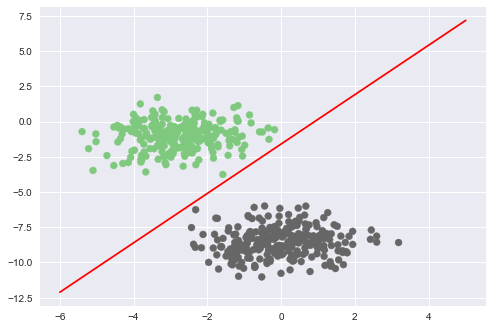

In [8]:
#now we know there are 2 features so we obtain ten random points of x1 to get corresponding points of x2 to draw a line. 
x1=np.linspace(-6,5,10)
x2=-(weights[0]+weights[1]*x1)/weights[2]
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show

In [9]:
#find accuracy!
Y_=getPredictions(X,weights,labels=True)
#print(Y_)
(Y_==Y)#(to check whether predictions are true or not)
training_acc=np.sum(Y_==Y)/Y.shape[0]
print(training_acc*100)
#we get 87.4 for moons datasets

100.0
